# 차원축소 Assignment2 Tobigs15th 이성범

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

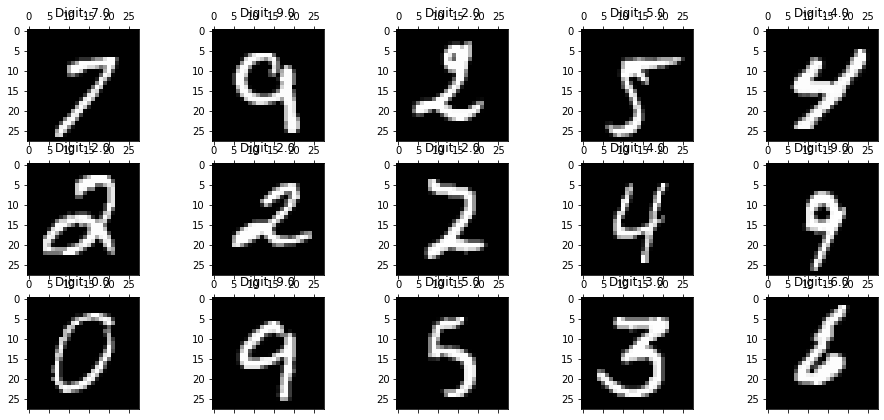

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['y'], axis=1), df['y'], random_state = 22, test_size = 0.2, stratify=df['y'])

분류 데이터이기 때문에 stratify하게 데이터를 분리해주었다.

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

차원 축소를 위하여 분산을 1로 통일시켜주고자 표준화를 진행했다.

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Hwo to best PCA components')

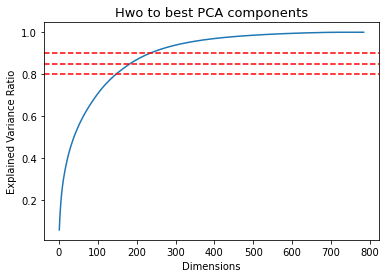

In [12]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.9, linestyle='--', color='r')
plt.axhline(0.85, linestyle='--', color='r')
plt.axhline(0.8, linestyle='--', color='r')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Hwo to best PCA components', fontsize=13)

축소된 차원의 개수에 따른 설명력을 그래프로 나타낸 결과 기울기가 급하게 바뀌는 0.85 정도의 설명력을 가지는 것이 합당하다고 판단했다.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [14]:
print(f'PCA에서 0.85의 설명력을 가지는 주성분의 개수: {len(pca.explained_variance_ratio_)}')

PCA에서 0.85의 설명력을 가지는 주성분의 개수: 184


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Text(0.5, 1.0, 'Hwo to best LDA components')

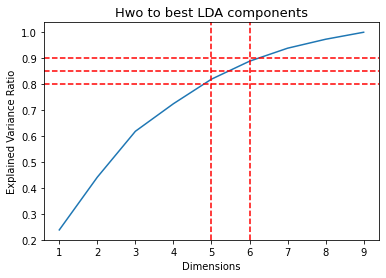

In [16]:
plt.plot(range(1, len(lda.explained_variance_ratio_) + 1), np.cumsum(lda.explained_variance_ratio_))
plt.axhline(0.9, linestyle='--', color='r')
plt.axhline(0.85, linestyle='--', color='r')
plt.axhline(0.8, linestyle='--', color='r')
plt.axvline(5, linestyle='--', color='r')
plt.axvline(6, linestyle='--', color='r')
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('Hwo to best LDA components', fontsize=13)

축소된 차원의 개수에 따른 설명력을 그래프로 나타낸 결과 그래프의 기울기 급하게 바뀌는 특정한 지점을 찾을 수 없어서 기본적인 차원 축소의 기준인 0.8 정도의 설명력을 가지는 것이 가장 합당하다고 판단했다.

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [18]:
print(f'LDA에서 0.8의 설명력을 가지는 주성분의 개수: {len(lda.explained_variance_ratio_)}')

LDA에서 0.8의 설명력을 가지는 주성분의 개수: 5


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

# RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
import time

rf = RandomForestClassifier(random_state=22)
rf_pca = RandomForestClassifier(random_state=22)
rf_lda = RandomForestClassifier(random_state=22)

start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
rf_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
rf_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

rf_train = rf.predict(X_train)
rf_pca_train = rf_pca.predict(X_train_pca)
rf_lda_train = rf_lda.predict(X_train_lda)

rf_test = rf.predict(X_test)
rf_pca_test = rf_pca.predict(X_test_pca)
rf_lda_test = rf_lda.predict(X_test_lda)

원본 데이터 훈련 시간: 33.346035957336426
PCA 데이터 훈련 시간 : 96.04770612716675
LDA 데이터 훈련 시간 : 15.258699417114258


In [20]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(rf_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(rf_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(rf_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(rf_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(rf_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(rf_lda_test, y_test) ))

Train-Set
원본데이터 :1.0 
PCA        :1.0 
LDA        :0.9999821428571428 

Test-Set
원본데이터 :0.9679285714285715 
PCA        :0.9417857142857143 
LDA        :0.8456428571428571 


# LGBM

In [21]:
import lightgbm as LGBM
import time

lgbm = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

lgbm_pca = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

lgbm_lda = LGBM.LGBMClassifier(random_state=22, 
                           tree_method='gpu_hist', 
                           predictor='gpu_predictor')

start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
lgbm_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
lgbm_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

lgbm_train = lgbm.predict(X_train)
lgbm_pca_train = lgbm_pca.predict(X_train_pca)
lgbm_lda_train = lgbm_lda.predict(X_train_lda)

lgbm_test = lgbm.predict(X_test)
lgbm_pca_test = lgbm_pca.predict(X_test_pca)
lgbm_lda_test = lgbm_lda.predict(X_test_lda)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  .format(key))


원본 데이터 훈련 시간: 240.48539900779724


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  .format(key))


PCA 데이터 훈련 시간 : 81.22412157058716


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:741: UserWarning: predictor keyword has been found in `params` and will be ignored.
Please use predictor argument of the Dataset constructor to pass this parameter.
  .format(key))


LDA 데이터 훈련 시간 : 4.125357389450073


In [22]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(lgbm_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(lgbm_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(lgbm_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(lgbm_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(lgbm_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(lgbm_lda_test, y_test) ))

Train-Set
원본데이터 :0.9984464285714286 
PCA        :0.9921607142857143 
LDA        :0.8812678571428572 

Test-Set
원본데이터 :0.9707142857142858 
PCA        :0.9515 
LDA        :0.845 


# XGBoost

In [23]:
import xgboost as XGB

xgb = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

xgb_pca = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

xgb_lda = XGB.XGBClassifier(random_state=22, 
                        tree_method='gpu_hist', 
                        predictor='gpu_predictor')

start = time.time()
xgb.fit(X_train, y_train)
end = time.time()
print(f"원본 데이터 훈련 시간: {end - start}")

start = time.time()
xgb_pca.fit(X_train_pca, y_train)
end = time.time()
print(f"PCA 데이터 훈련 시간 : {end - start}")

start = time.time()
xgb_lda.fit(X_train_lda, y_train)
end = time.time()
print(f"LDA 데이터 훈련 시간 : {end - start}")

xgb_train = xgb.predict(X_train)
xgb_pca_train = xgb_pca.predict(X_train_pca)
xgb_lda_train = xgb_lda.predict(X_train_lda)

xgb_test = xgb.predict(X_test)
xgb_pca_test = xgb_pca.predict(X_test_pca)
xgb_lda_test = xgb_lda.predict(X_test_lda)

원본 데이터 훈련 시간: 16.673091650009155
PCA 데이터 훈련 시간 : 7.160913944244385
LDA 데이터 훈련 시간 : 4.021643161773682


In [24]:
from sklearn.metrics import accuracy_score

print('Train-Set')
print("원본데이터 :{} ".format( accuracy_score(xgb_train, y_train) ))
print("PCA        :{} ".format( accuracy_score(xgb_pca_train, y_train) ))
print("LDA        :{} ".format( accuracy_score(xgb_lda_train, y_train) ))

print()

print('Test-Set')
print("원본데이터 :{} ".format( accuracy_score(xgb_test, y_test) ))
print("PCA        :{} ".format( accuracy_score(xgb_pca_test, y_test) ))
print("LDA        :{} ".format( accuracy_score(xgb_lda_test, y_test) ))

Train-Set
원본데이터 :0.9453214285714285 
PCA        :0.9241607142857143 
LDA        :0.8493214285714286 

Test-Set
원본데이터 :0.9307857142857143 
PCA        :0.9091428571428571 
LDA        :0.8381428571428572 


차원 축소를 하는 이유는 크게 2가지로 나눌 수 있다.

1. 데이터의 설명력을 많이 손실시키지 않는 선에서 차원을 축소함으로써 모델의 학습 속도를 높여 빠르게 분석의 피드백을 하기 위함이 있다.
2. 아마지와 같은 희소한 데이터의 경우 0이 많이 존재하기 때문에 모델을 학습시에 과적합이 발생할 수 있어 차원을 축소함으로써 데이터의 희소성을 줄이고 0을 제거하여 모델의 과적함을 해소하기 위함이 있다.

기본적으로 차원을 축소한다면 축소된 차원 만큼의 데이터에 대한 설명력이 감소함에 따라 모델의 성능이 하락한다. 하지만 그럼에도 우리가 차원을 축소하는 이유는 모델의 학습 속도를 높여서(차원이 많으면 많을 수록 차원의 저주 및 모델의 학습속도는 배로 늘어남) 빠른 피드백을 통해서 더 나은 모델을 만들기 위함이 있고 희소한 데이터의 경우 희소성을 줄임으로써 모델의 일반화를 높이기 위함이 있다.

따라서 차원축소 기법은 분석자의 상황 및 데이터의 종류에 따라서 알맞게 시행되어야 할 것이다.

특정한 틀 없이 자유롭게 해주시면 됩니다!

## 가장 높은 test accuracy가 나오신 분께 이모티콘을 증정해드리겠습니다!!